In [5]:
import random
import numpy as np
from PIL import Image
import os

In [6]:
DATASET_DIR: str = 'dataset'

N_PATTERN_IMG = 500

PATTERNS: dict[str: list[np.ndarray]] = {
    'uniform': [
        np.full((2, 2), 255),
        np.zeros((2, 2))
    ],
    'horizontal': [
        np.array([[255, 255], [0, 0]]),
        np.array([[0, 0], [255, 255]]),
    ],
    'vertical': [
        np.array([[255, 0], [255, 0]]),
        np.array([[0, 255], [0, 255]]),
    ],
    'diagonal': [
        np.array([[255, 0], [0, 255]]),
        np.array([[0, 255], [255, 0]]),
    ]
}

In [7]:
os.makedirs(DATASET_DIR, exist_ok=True)

for label, patterns in PATTERNS.items():
    for p_i, pattern in enumerate(patterns):
        for i in range(N_PATTERN_IMG):
            white: int = random.randint(155, 255)
            black: int = random.randint(0, 100)

            img: np.ndarray = np.where(pattern == 255, white, black)
            noise = np.random.randint(-40, 41, (2, 2))
            img = np.clip(img + noise, 0, 255)

            filename = f'{label}_{p_i * N_PATTERN_IMG + i + 1}.jpeg'
            path = os.path.join(DATASET_DIR, filename)
            Image.fromarray(img.astype(np.uint8)).save(path)


# Dataset preview

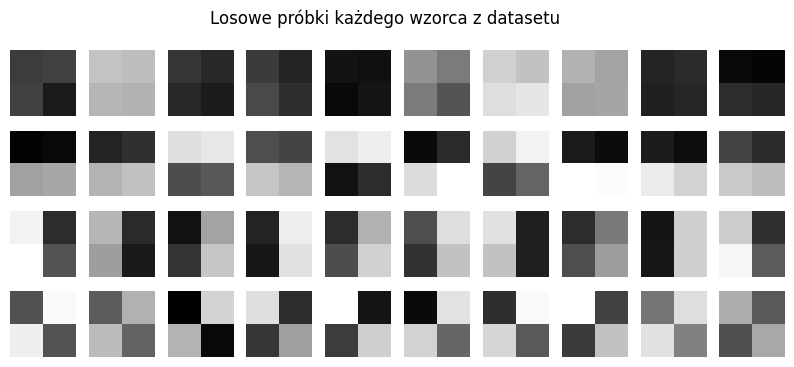

In [8]:
import matplotlib.pyplot as plt

preview_n = 10

cols = 10
rows = 4

fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))

for row, label in enumerate(PATTERNS):
    for col in range(cols):
        sample_idx = random.randint(0, 1) * N_PATTERN_IMG + random.randint(1, N_PATTERN_IMG)
        filename = f'{label}_{sample_idx}.jpeg'
        path = os.path.join(DATASET_DIR, filename)

        img = Image.open(path)
        axes[row, col].imshow(img, cmap='gray', vmin=0, vmax=255)
        axes[row, col].axis('off')

fig.suptitle('Losowe próbki każdego wzorca z datasetu')
plt.savefig('dataset_samples.png')
plt.show()

